In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv('Car_Crash (2).csv')


In [3]:
df.head()


,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.describe(include ='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [6]:
df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [7]:
print("the no of rows",df.shape[0],"&", "the no of colums ",df.shape[1])

the no of rows 11217 & the no of colums  15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [10]:
# Check for missing value in any column
df.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [11]:
for feature in df.columns:
 if df[feature].dtype=='object':
    print(feature.upper() ," ",df[feature].nunique())
    print(df[feature].value_counts().sort_values())

DVCAT   5
1-9km/h     282
55+         809
40-54      1344
25-39      3368
10-24      5414
Name: dvcat, dtype: int64
SURVIVED   2
Not_Survived     1180
survived        10037
Name: Survived, dtype: int64
AIRBAG   2
none      4153
airbag    7064
Name: airbag, dtype: int64
SEATBELT   2
none      3368
belted    7849
Name: seatbelt, dtype: int64
SEX   2
f    5169
m    6048
Name: sex, dtype: int64
ABCAT   3
nodeploy    2699
unavail     4153
deploy      4365
Name: abcat, dtype: int64
OCCROLE   2
pass      2431
driver    8786
Name: occRole, dtype: int64
CASEID   6488
76:31:2     1
73:118:2    1
4:67:1      1
47:52:2     1
75:117:1    1
           ..
49:156:1    6
74:74:2     6
73:110:1    6
75:84:2     6
73:100:2    7
Name: caseid, Length: 6488, dtype: int64


In [12]:
df.Survived.value_counts()


survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

In [13]:
df.seatbelt.value_counts()


belted    7849
none      3368
Name: seatbelt, dtype: int64

In [14]:
df.sex.value_counts()


m    6048
f    5169
Name: sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

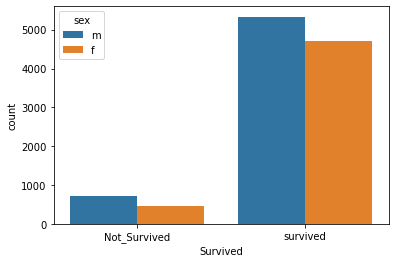

In [15]:
sns.countplot(df["Survived"],hue=df["sex"]) 

In [16]:
pd.crosstab(df['sex'],df['Survived'] )

Survived,Not_Survived,survived
sex,,
f,464,4705
m,716,5332


<AxesSubplot:xlabel='Survived', ylabel='count'>

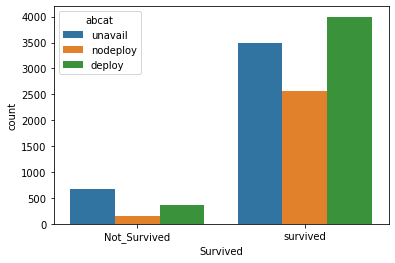

In [17]:
sns.countplot(df["Survived"],hue=df["abcat"])


In [18]:
pd.crosstab(df['abcat'],df['Survived'] )

Survived,Not_Survived,survived
abcat,,
deploy,368,3997
nodeploy,143,2556
unavail,669,3484


<AxesSubplot:xlabel='Survived', ylabel='count'>

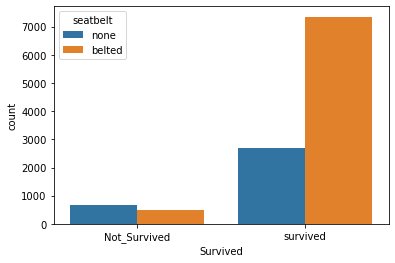

In [19]:
sns.countplot(df["Survived"],hue=df["seatbelt"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

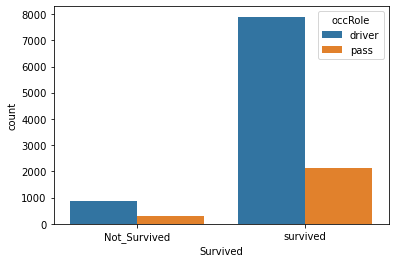

In [20]:
sns.countplot(df["Survived"],hue=df["occRole"])

In [21]:
pd.crosstab(df['occRole'],df['Survived'] )

Survived,Not_Survived,survived
occRole,,
driver,891,7895
pass,289,2142


In [22]:
pd.crosstab(df['yearVeh'],df['Survived'] )

Survived,Not_Survived,survived
yearVeh,,
1953.0,0,1
1956.0,0,2
1961.0,0,1
1963.0,1,1
1965.0,0,3
1966.0,3,2
1967.0,1,0
1968.0,1,3
1969.0,4,7


In [23]:
def univariateAnalysis_numeric(column,nbins): 
 print("Description of " + column) 
 print("------------------------------------------------------------------------")
 print(df[column].describe(),end=' ') 
 
 plt.figure()
 print("Distribution of " + column) 
 print("------------------------------------------------------------------------")
 sns.distplot(df[column], kde=True, color='b'); 
 plt.show() 
 
 plt.figure() 
 print("BoxPlot of " + column) 
 print("------------------------------------------------------------------------") 
 ax= sns.boxplot(x=df[column],color='y') 
 plt.show()


In [24]:
df_num= df.select_dtypes(include= ['int64'])
df_cat=df.select_dtypes(["object"])
Categorical_column_list=list(df_cat.columns.values)
Numerical_column_list= list(df_num.columns.values)
Numerical_length=len(Numerical_column_list)
Categorical_length=len(Categorical_column_list)
print("Length of Numerical columns is :",Numerical_length)
print("Length of Categorical columns is :",Categorical_length)

Length of Numerical columns is : 4
Length of Categorical columns is : 8


In [25]:
df_cat.head()


,dvcat,Survived,airbag,seatbelt,sex,abcat,occRole,caseid
0,55+,Not_Survived,none,none,m,unavail,driver,2:13:2
1,25-39,Not_Survived,airbag,belted,f,nodeploy,driver,2:17:1
2,55+,Not_Survived,none,belted,m,unavail,driver,2:79:1
3,55+,Not_Survived,none,belted,f,unavail,pass,2:79:1
4,55+,Not_Survived,none,none,m,unavail,driver,4:58:1


In [26]:
df_num.head()

,frontal,ageOFocc,yearacc,deploy
0,1,32,1997,0
1,0,54,1997,0
2,1,67,1997,0
3,1,64,1997,0
4,1,23,1997,0


Description of frontal
------------------------------------------------------------------------
count    11217.000000
mean         0.644022
std          0.478830
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: frontal, dtype: float64 Distribution of frontal
------------------------------------------------------------------------


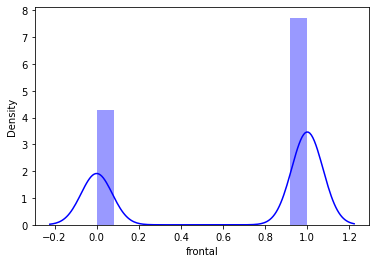

BoxPlot of frontal
------------------------------------------------------------------------


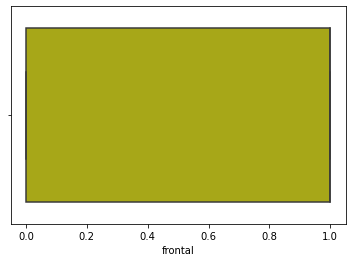

Description of ageOFocc
------------------------------------------------------------------------
count    11217.000000
mean        37.427654
std         18.192429
min         16.000000
25%         22.000000
50%         33.000000
75%         48.000000
max         97.000000
Name: ageOFocc, dtype: float64 Distribution of ageOFocc
------------------------------------------------------------------------


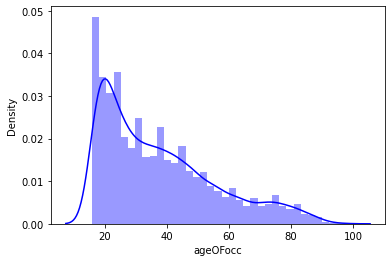

BoxPlot of ageOFocc
------------------------------------------------------------------------


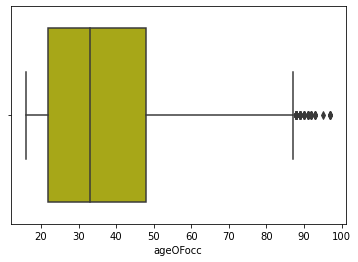

Description of yearacc
------------------------------------------------------------------------
count    11217.000000
mean      2001.103236
std          1.056805
min       1997.000000
25%       2001.000000
50%       2001.000000
75%       2002.000000
max       2002.000000
Name: yearacc, dtype: float64 Distribution of yearacc
------------------------------------------------------------------------


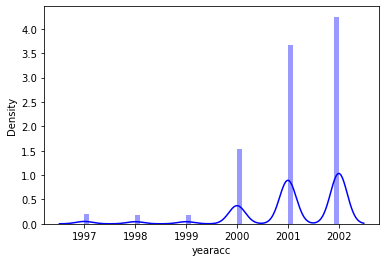

BoxPlot of yearacc
------------------------------------------------------------------------


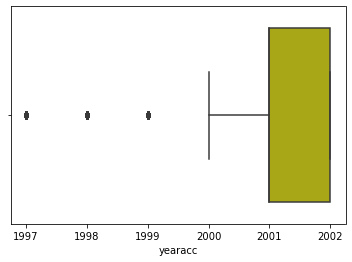

Description of deploy
------------------------------------------------------------------------
count    11217.000000
mean         0.389141
std          0.487577
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deploy, dtype: float64 Distribution of deploy
------------------------------------------------------------------------


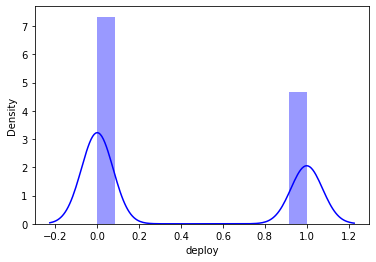

BoxPlot of deploy
------------------------------------------------------------------------


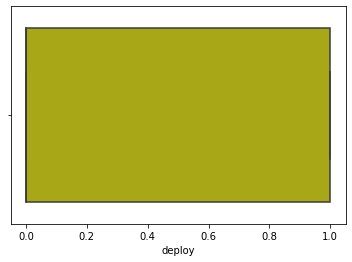

In [27]:
for x in Numerical_column_list: 
 univariateAnalysis_numeric(x,20)

Text(0.5, 0, 'Age of Occupant')

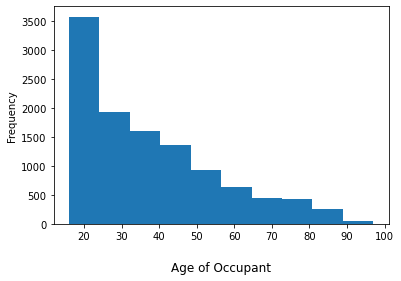

In [28]:
ax= df['ageOFocc'].plot(kind='hist')
ax.set_xlabel("Age of Occupant", labelpad=20, size=12)

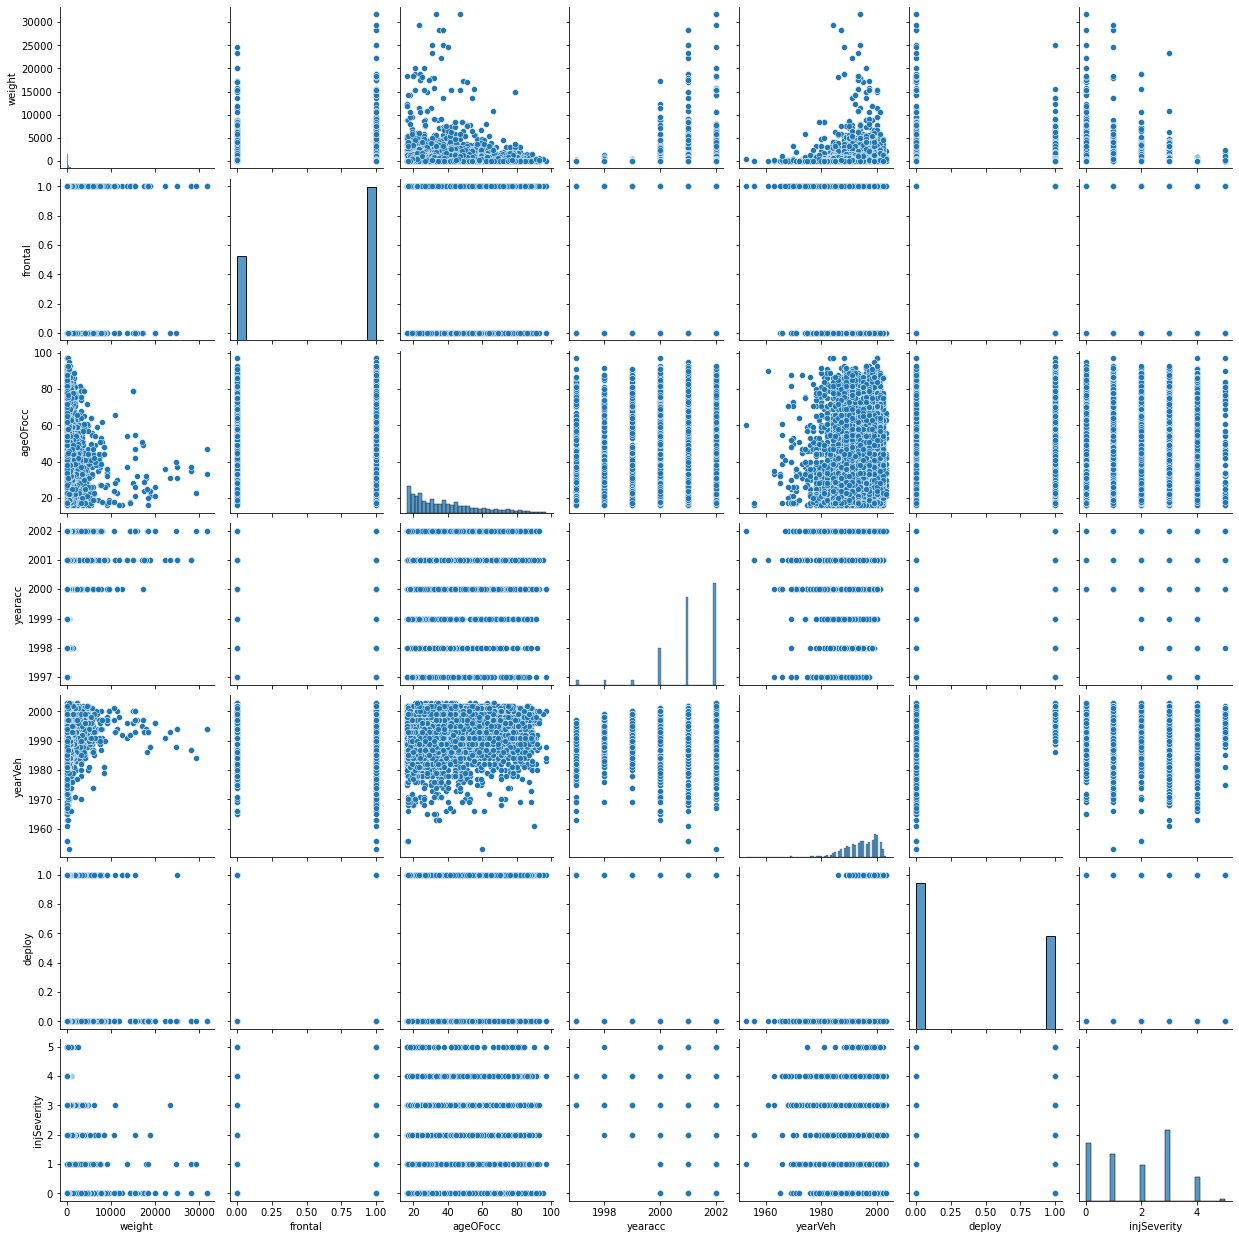

In [29]:
sns.pairplot(df)

In [30]:
df.skew()

weight         11.115386
frontal        -0.601667
ageOFocc        0.911059
yearacc        -1.671687
yearVeh        -1.026743
deploy          0.454813
injSeverity     0.035177
dtype: float64

<AxesSubplot:>

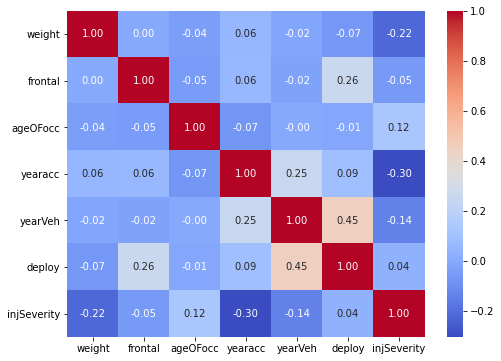

In [31]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [32]:
#null value check
df.isnull().sum()


dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [33]:
df[df.isin([0])].stack(0)

0      deploy         0.0
1      frontal        0.0
       deploy         0.0
2      deploy         0.0
3      deploy         0.0
                     ... 
11212  deploy         0.0
       injSeverity    0.0
11213  deploy         0.0
11215  injSeverity    0.0
11216  injSeverity    0.0
Length: 13598, dtype: object

In [34]:
df.loc[((df['deploy'] == 0) | (df['frontal'] == 0) | (df['injSeverity'] == 0))]


,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11211,25-39,261.217,survived,airbag,belted,0,f,45,2002,1997.0,nodeploy,driver,0,2.0,82:106:2
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [35]:
df.drop(df[((df['deploy'] == 0) | (df['frontal'] == 0)| (df['injSeverity'] == 0))].index,inplace=True)

In [36]:
df[df.isin([0])].stack(0)

2570  weight    0.0
2980  weight    0.0
2981  weight    0.0
2982  weight    0.0
4017  weight    0.0
4331  weight    0.0
7692  weight    0.0
dtype: object

In [37]:
for column in df.columns:
 if df[column].dtype != 'object':
    median = df[column].median()
    df[column] = df[column].fillna(median) 
 
df.isnull().sum()


dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [38]:
df.dtypes[(df.dtypes=='object')].index


Index(['dvcat', 'Survived', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole',
       'caseid'],
      dtype='object')

In [39]:
import pandas as pd

In [40]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
 
    label_encoder_dict = {}
    for column in df.columns:
         # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [41]:
label_encoders = create_label_encoder_dict(df)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column,label_encoders[column].classes_))
print(pd.DataFrame([range(0,len(label_encoders[column].classes_))],columns=label_encoders[column].classes_))


Encoded Values for each Label
Encoder(dvcat) = ['1-9km/h' '10-24' '25-39' '40-54' '55+']
Encoder(Survived) = ['Not_Survived' 'survived']
Encoder(airbag) = ['airbag']
Encoder(seatbelt) = ['belted' 'none']
Encoder(sex) = ['f' 'm']
Encoder(abcat) = ['deploy']
Encoder(occRole) = ['driver' 'pass']
Encoder(caseid) = ['11:107:1' '11:108:1' '11:109:2' ... '9:98:1' '9:98:2' '9:9:1']
   11:107:1  11:108:1  11:109:2  11:111:1  11:112:1  11:112:2  11:114:1  \
0         0         1         2         3         4         5         6   

   11:116:1  11:116:2  11:117:1  ...  9:87:1  9:87:2  9:8:1  9:92:1  9:94:1  \
0         7         8         9  ...    2185    2186   2187    2188    2189   

   9:97:1  9:97:2  9:98:1  9:98:2  9:9:1  
0    2190    2191    2192    2193   2194  

[1 rows x 2195 columns]


In [42]:
# Apply each encoder to the data set to obtain transformed values
df2 = df.copy() # create copy of initial data set
for column in df2.columns:
    if column in label_encoders:
        df2[column] = label_encoders[column].transform(df2[column])
print("Transformed data set")
print("*"*20)
df2.head()

Transformed data set
********************


,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
7,1,13.374,0,0,0,1,1,37,1997,1995.0,0,0,1,4.0,997
9,2,15.355,0,0,1,1,0,84,1997,1996.0,0,0,1,4.0,1001
27,3,12.536,0,0,1,1,1,27,1997,1995.0,0,1,1,4.0,1143
49,3,51.366,0,0,1,1,1,49,1997,1993.0,0,0,1,4.0,1
51,3,51.366,0,0,1,1,0,18,1997,1996.0,0,0,1,4.0,27


In [43]:
# Arrange data into independent variables and dependent variables
X= df2.drop("Survived",axis=1)
y= df2[["Survived"]]

In [44]:
from scipy.stats import zscore

In [45]:
X.apply(zscore)


,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
7,-0.919522,-0.320180,NaN,-0.662155,NaN,0.997817,-0.046756,-4.741122,-0.868217,NaN,-0.459666,NaN,1.771054,-0.169624
9,0.126463,-0.317395,NaN,1.510220,NaN,-1.002187,2.563300,-4.741122,-0.521132,NaN,-0.459666,NaN,1.771054,-0.163309
27,1.172448,-0.321358,NaN,1.510220,NaN,0.997817,-0.602087,-4.741122,-0.868217,NaN,2.175495,NaN,1.771054,0.060882
49,1.172448,-0.266770,NaN,1.510220,NaN,0.997817,0.619641,-4.741122,-1.562386,NaN,-0.459666,NaN,1.771054,-1.742115
51,1.172448,-0.266770,NaN,1.510220,NaN,-1.002187,-1.101885,-4.741122,-0.521132,NaN,-0.459666,NaN,1.771054,-1.701066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11181,-0.919522,-0.330642,NaN,-0.662155,NaN,0.997817,-0.546554,0.829747,0.867206,NaN,2.175495,NaN,0.745255,1.361818
11185,-0.919522,-0.333072,NaN,-0.662155,NaN,-1.002187,-0.768687,0.829747,0.867206,NaN,2.175495,NaN,-1.306344,1.364976
11197,0.126463,-0.332063,NaN,-0.662155,NaN,0.997817,-0.879753,0.829747,1.561375,NaN,-0.459666,NaN,-1.306344,1.371291
11198,0.126463,-0.332063,NaN,-0.662155,NaN,0.997817,-0.824220,0.829747,1.561375,NaN,2.175495,NaN,-1.306344,1.371291


In [46]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


In [47]:
Logistic_model= LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none')
Logistic_model.fit(X_train, y_train)
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print("Logistic Model Score for Train Data is ", Logistic_model_score)

Logistic Model Score for Train Data is  0.9745057232049948


In [48]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [49]:
# Training Data Class Prediction 
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print("LDA Model Score for Training Data without GridSearch is",LDA_model_score)

LDA Model Score for Training Data without GridSearch is 0.9656607700312175


In [50]:
# Test Data Class Prediction 
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print("LDA Model Score for Test Data without GridSearch is",LDA_model_score)

LDA Model Score for Test Data without GridSearch is 0.9587378640776699


In [51]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9745057232049948
[[ 112   30]
 [  19 1761]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       142
           1       0.98      0.99      0.99      1780

    accuracy                           0.97      1922
   macro avg       0.92      0.89      0.90      1922
weighted avg       0.97      0.97      0.97      1922



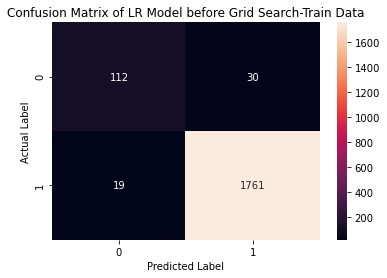

In [52]:
ax=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of LR Model before Grid Search-Train Data')
plt.show()

AUC of LR model without Grid Search for Train Data is: 0.987


Text(0.5, 1.0, ' AUC-ROC Train Data-LR Model without GridSearch ')

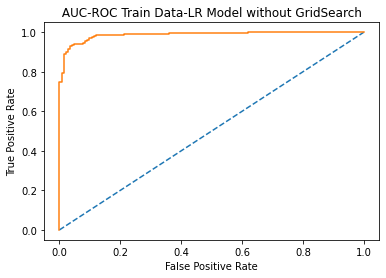

In [53]:
# predict probabilities
probs= Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only 
probs= probs[:,1]
# calculate AUC 
auc= roc_auc_score(y_train, probs)
print('AUC of LR model without Grid Search for Train Data is: %.3f' % auc)
# calculate roc curve 
train_fpr, train_tpr, train_thresholds= roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" AUC-ROC Train Data-LR Model without GridSearch ")

In [54]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9769417475728155
[[ 45  14]
 [  5 760]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        59
           1       0.98      0.99      0.99       765

    accuracy                           0.98       824
   macro avg       0.94      0.88      0.91       824
weighted avg       0.98      0.98      0.98       824



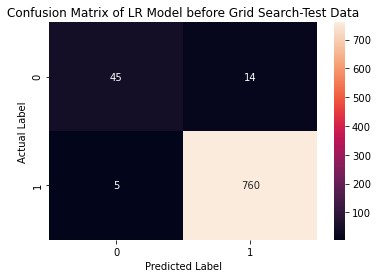

In [55]:
# Confusion Matrix of Logistic Reg Model-Test Data
ax=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of LR Model before Grid Search-Test Data')
plt.show()

AUC of LR model without Grid Search for Test Data is: 0.994


Text(0.5, 1.0, ' AUC-ROC Test Data-LR Model without GridSearch ')

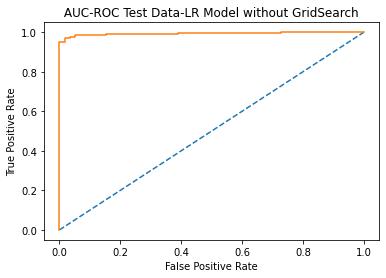

In [56]:
# predict probabilities
probs= Logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only 
probs= probs[:,1]
# calculate AUC 
auc= roc_auc_score(y_test, probs)
print('AUC of LR model without Grid Search for Test Data is: %.3f' % auc)
# calculate roc curve 
test_fpr, test_tpr, test_thresholds= roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" AUC-ROC Test Data-LR Model without GridSearch ")

In [57]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))


[[ 112   30]
 [  19 1761]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       142
           1       0.98      0.99      0.99      1780

    accuracy                           0.97      1922
   macro avg       0.92      0.89      0.90      1922
weighted avg       0.97      0.97      0.97      1922



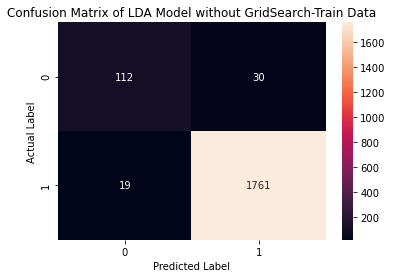

In [58]:
#Confusion Matrix of LDA Model-Train Data
ax=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of LDA Model without GridSearch-Train Data')
plt.show()

the auc 0.965 


Text(0.5, 1.0, ' AUC-ROC Train Data-LDA Model without GridSearch ')

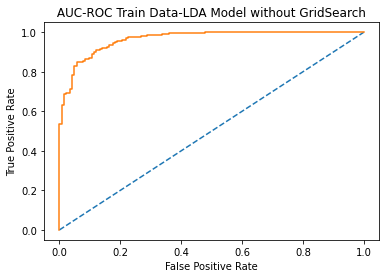

In [59]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" AUC-ROC Train Data-LDA Model without GridSearch ")


In [60]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 45  14]
 [  5 760]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        59
           1       0.98      0.99      0.99       765

    accuracy                           0.98       824
   macro avg       0.94      0.88      0.91       824
weighted avg       0.98      0.98      0.98       824



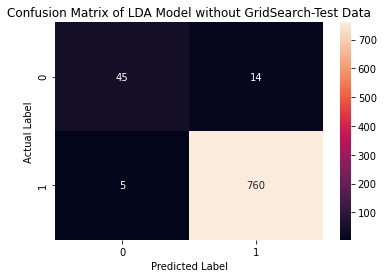

In [61]:
# Confusion Matrix of LDA Model-Test Data
ax=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of LDA Model without GridSearch-Test Data')
plt.show()

the auc 0.969 


Text(0.5, 1.0, ' AUC-ROC Test Data-LDA Model without GridSearch ')

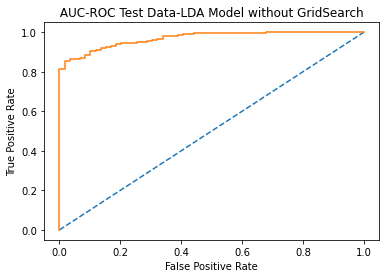

In [62]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc %.3f " % auc)
test_fpr ,test_tpr, test_thresholds= roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr ,test_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" AUC-ROC Test Data-LDA Model without GridSearch ")